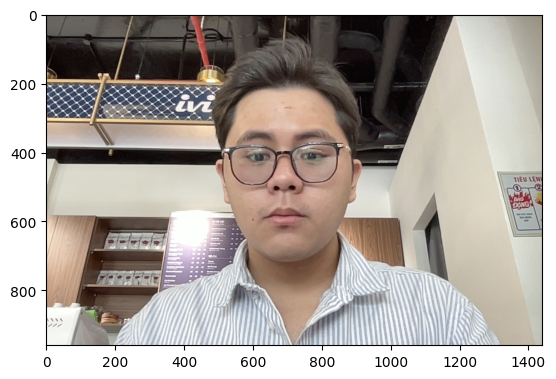

In [90]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import matplotlib.pyplot as plt
from PIL import Image

sample_image = Image.open('./sample/face.jpg')

plt.imshow(sample_image)

In [91]:
mtcnn = MTCNN(margin=32)
resnet = InceptionResnetV1(pretrained="vggface2").eval()


In [92]:
cropped_image = mtcnn(sample_image)
features = resnet(cropped_image.unsqueeze(0))
features

tensor([[ 0.0152,  0.0210, -0.0189,  0.0406,  0.0277, -0.0023,  0.0243, -0.0245,
          0.0267,  0.0525,  0.0442,  0.0164, -0.0776,  0.0069,  0.0244, -0.0091,
          0.0675,  0.0787, -0.0129,  0.0671,  0.0572, -0.0032,  0.0769, -0.0162,
         -0.0155, -0.0304,  0.0118, -0.0131, -0.0406,  0.0134,  0.0076,  0.0575,
         -0.0650,  0.0871,  0.0392, -0.0475,  0.0098, -0.0800, -0.0172,  0.0234,
          0.0096, -0.0366, -0.0807,  0.0199, -0.0112, -0.0072,  0.0210, -0.0200,
         -0.0205,  0.0335,  0.0173, -0.1042,  0.0557,  0.0632, -0.0075, -0.0849,
         -0.0923,  0.0544,  0.0024,  0.0461, -0.0292,  0.0215, -0.0284,  0.0599,
          0.0161, -0.0369, -0.0167, -0.0019,  0.0405, -0.0406, -0.0423, -0.0064,
         -0.0218,  0.0383,  0.0489,  0.0024,  0.0013,  0.0104,  0.0545, -0.0033,
          0.0469, -0.0204, -0.0334, -0.0623, -0.0062,  0.0607, -0.0155,  0.0102,
          0.0073,  0.0004, -0.0138,  0.0553, -0.0199, -0.0044,  0.0263,  0.0379,
          0.0149,  0.0715, -

In [93]:
import torch
torch.save(features, 'sample/output-features.pt')

input_features = torch.load("sample/output-features.pt")


taylor.jpeg ( 0 ,  0 )
face.jpg ( 0 ,  1 )
face2.jpg ( 0 ,  2 )
nguyen4.jpg ( 0 ,  3 )
ajlama.png ( 1 ,  0 )
tuanngoc.jpg ( 1 ,  1 )
nguyen2.jpg ( 1 ,  3 )
nguyen3.jpg ( 2 ,  0 )
nguyen1.jpg ( 2 ,  1 )
jbb.jpg ( 2 ,  2 )


<Figure size 640x480 with 0 Axes>

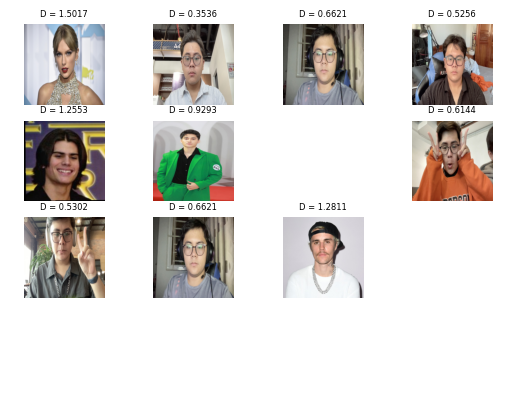

: 

In [147]:
import torchvision.transforms as transformer

def open_and_compare(which: str):
  compare_image = Image.open(which)
  compare_image = transformer.Resize((480, 480))(compare_image)
  cropped_compare_image = mtcnn(compare_image)
  if cropped_compare_image is None:
    return torch.tensor(9999)
  
  compare_features = resnet(cropped_compare_image.unsqueeze(0))
  return (compare_features - input_features).norm(), compare_image
  
import os
items = os.listdir('./sample')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
f, axarr = plt.subplots(4,4)


for i in range(4):
  for j in range(4):
    axarr[i,j].axis("off")

cur_row = 0
for idx,file in enumerate(items):
  if file != "output-features.pt":
    print(file, "(", cur_row,", ", idx % 4, ")")
    output_norm, comparing_image = open_and_compare("./sample/{}".format(file))
    
    axarr[cur_row, idx % 4].axis('off')
    axarr[cur_row, idx % 4].imshow(comparing_image)
    axarr[cur_row, idx % 4].set_title(label='D = %.4f' % output_norm.item(), size=6)
    
    # print(" . ", output_norm)
    
    if idx > 0 and idx % 4 == 3:
      cur_row = cur_row + 1
    
    